# 1.7 Линейная алгебра в деле


###### Боюсь, что некоторые фразы в предыдущем видео могли ввести вас в заблуждение.

Количественность переменной определятся не только возможностью упорядочить её значения.

Для линейной регрессии нам важно, чтобы мы могли (имело смысл) вычислять, насколько одно значение целевой переменной больше другого. То есть если по нашей шкале две пары объектов отличаются друг от друга на одинаковое значение, то и на самом деле разница между ними должна быть одинаковой в контексте задачи. 

Подробнее про типы переменных можно посмотреть, к примеру, в этом коротком уроке из курса по статистике.

Отметьте, какие ситуации подходят для анализа с помощью линейной регрессии:

P.S. Получилось довольно «хитрое» задание, направленное то, чтобы вы почувствовали тонкости определения. С ходу может и не получиться. В комментариях есть полезные обсуждения.

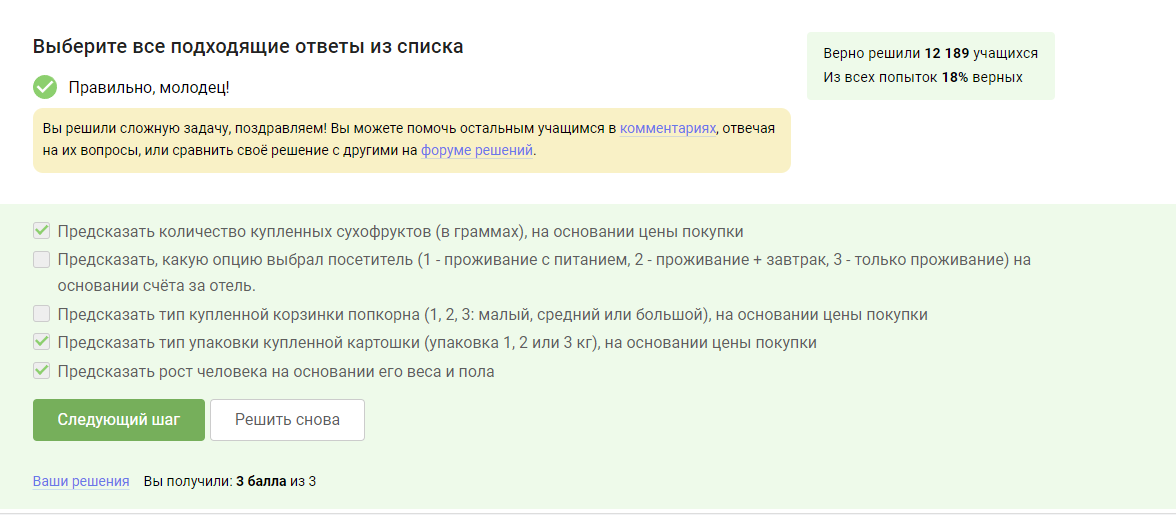

# Вопрос

###### Как вы думаете, на какой из картинок сумма квадратов отклонений данных (показанных точками) от предсказания (показанного прямой) меньше?

По горизонтальной оси - значение предиктора (xx), по вертикальной - целевая переменная.

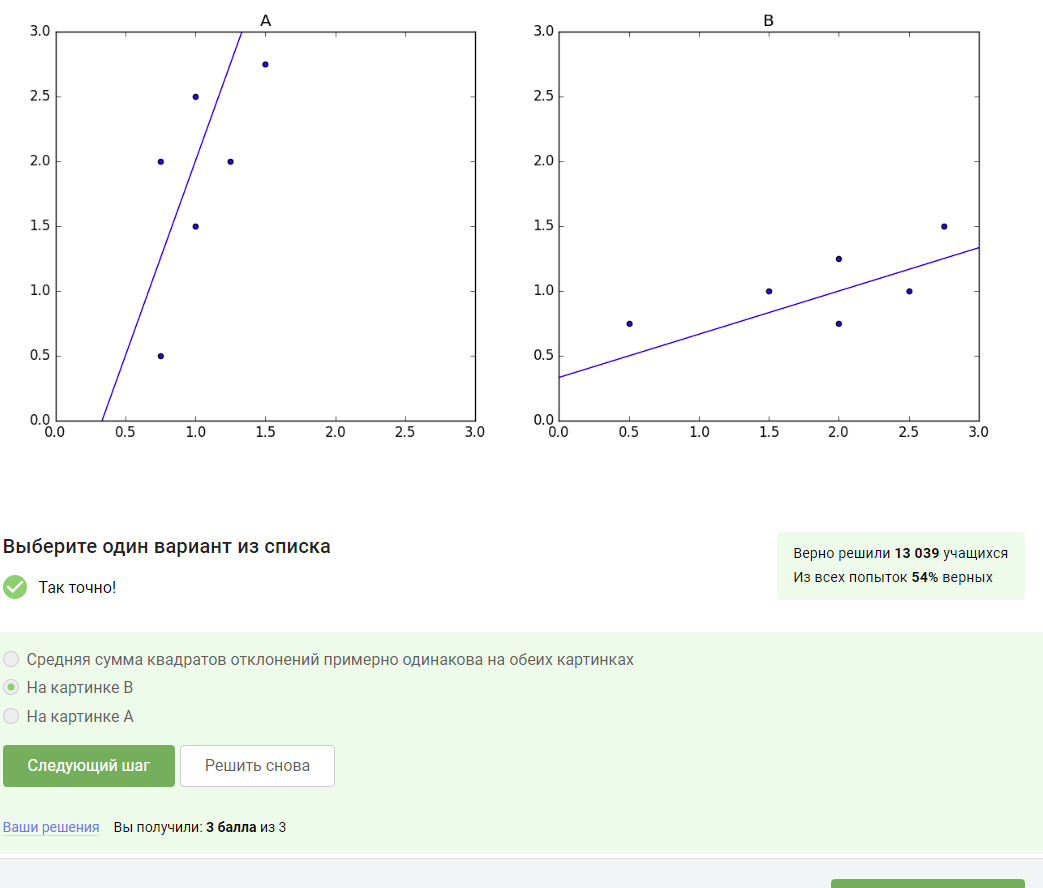

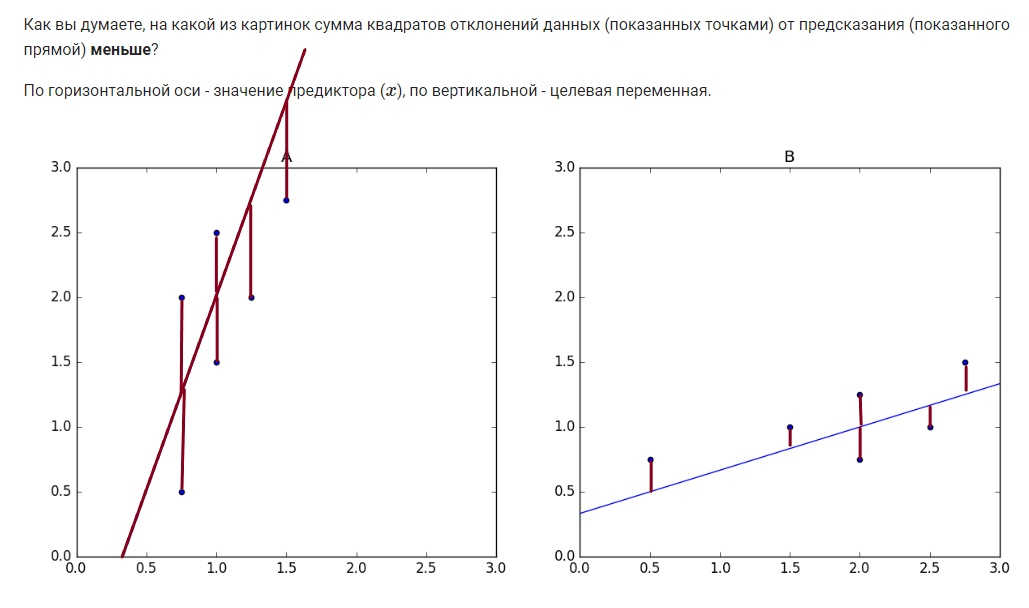

###### Я думаю, что решение подразумевает такое представление, т.е. суммируется квадрат отклонения (чтобы убрать знак минуса) точек от линии регрессии по оси Y. Для этого от каждой точки необходимо провести линию (проекцию) до линии регрессии.

# ВОПРОС

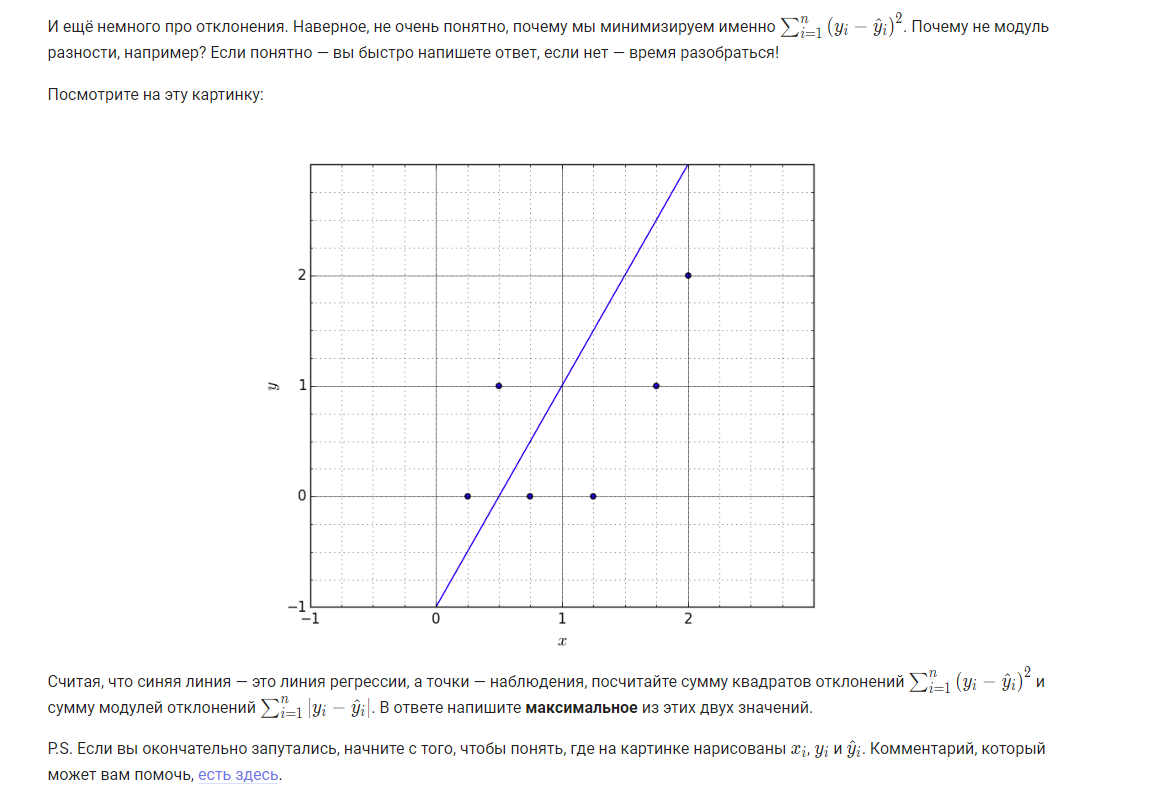

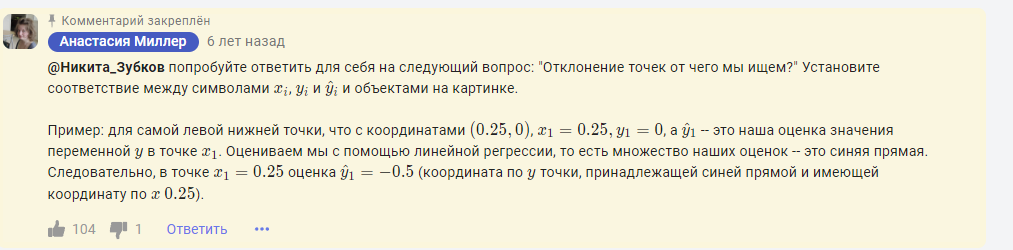

In [1]:
lin = ((0,-0.5),(0,0.5),(1,0),(0,1.5),(1,2.5),(2,3))

In [8]:
mod = 0
kw = 0

for i in lin:
    mod += abs(i[0]-i[1])
    kw += (i[0]-i[1])**2    
print('СУММА МОДУЛЕЙ',mod)
print('СУММА квадратов',kw)

СУММА МОДУЛЕЙ 6.0
СУММА квадратов 7.0


In [7]:
arr = ((0, -0.5), (1, 0), (0, 0.5), (0, 1.5), (1, 2.5), (2,3))

def sqerr(a, b):
  return (a - b)**2

def abserr(a, b):
  return abs(a - b)

def errsum(err_fun):
  return sum(list(map(lambda pair: err_fun(pair[0], pair[1]), arr)))

print(str(max(errsum(abserr), errsum(sqerr))))

7.0


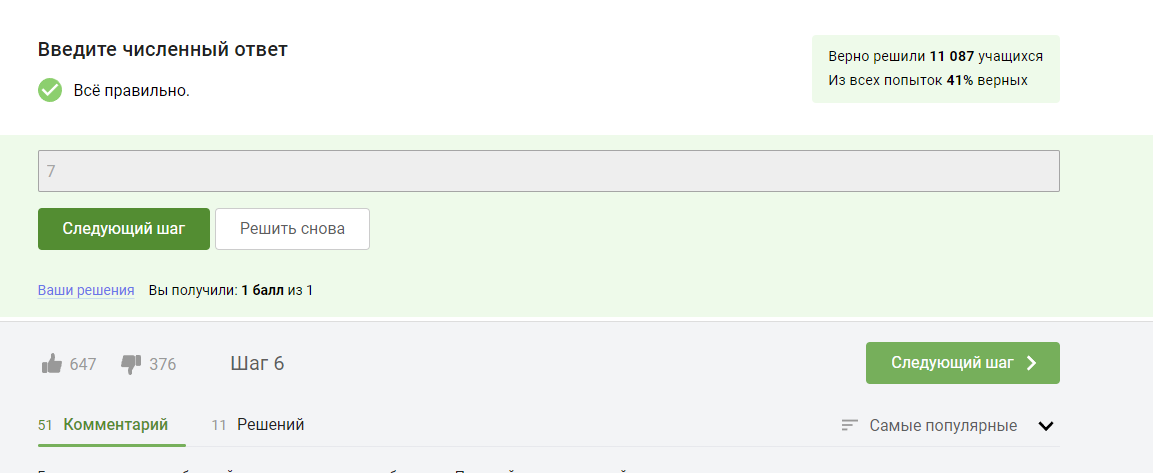

In [ ]:
import numpy as np
y = np.array([0,1,0,0,1,2])
y1 = np.array([-0.5,0,0.5,1.5,2.5,3])
print(max(np.sum((y-y1)**2), np.sum((abs(y-y1)))))


In [ ]:
vals = [(0, -0.5), (0, 0.5), (0, 1.5), (1, 0), (1, 2.5), (2, 3)]
funcs = [abs, lambda n: n * n]
print(max([sum([f(y - e) for y, e in vals]) for f in funcs]))

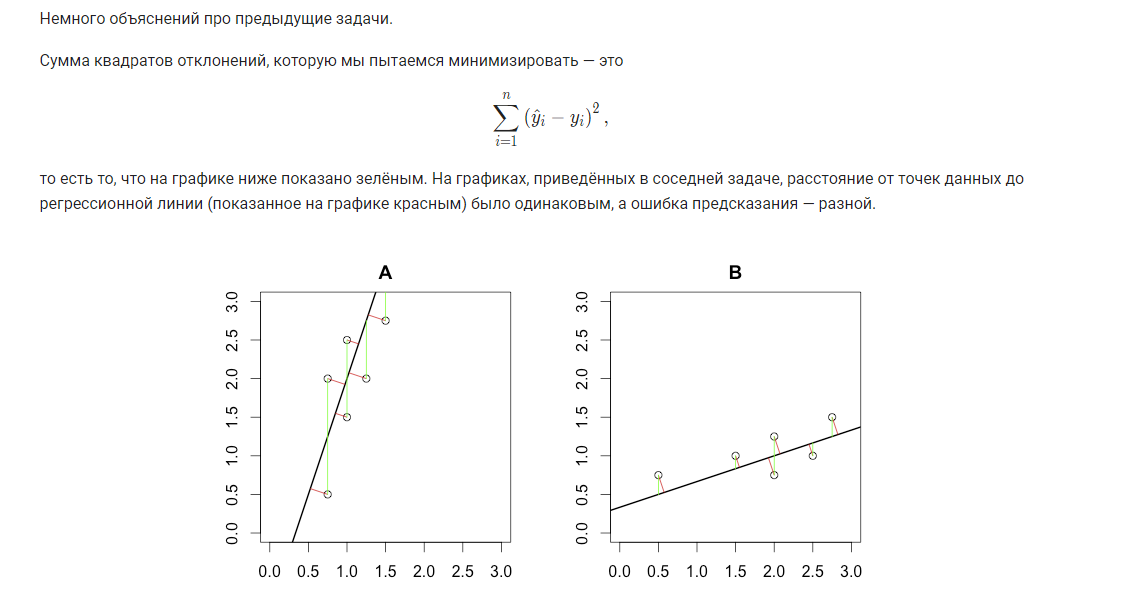

В процессе подсчёта суммы квадратов и суммы модулей отклонений вы могли заметить, что сумма квадратов «сильнее штрафует» за сильно отклоняющиеся наблюдения. Это одна из причин (дифференцируемость, например, тоже неплохая причина), по которым именно она выбирается в качестве целевой функции (функции, минимум которой хочется найти) в различных алгоритмах, связанных с минимизацией ошибок.

Для некоторых случаев есть и более строгое обоснование выбора именно такой меры ошибки, но эта история, к сожалению, выходит за рамки курса.

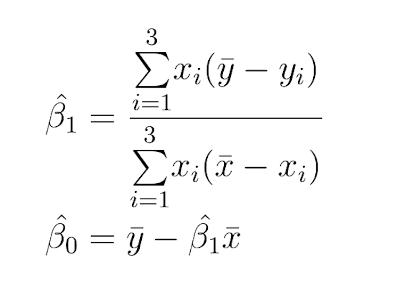

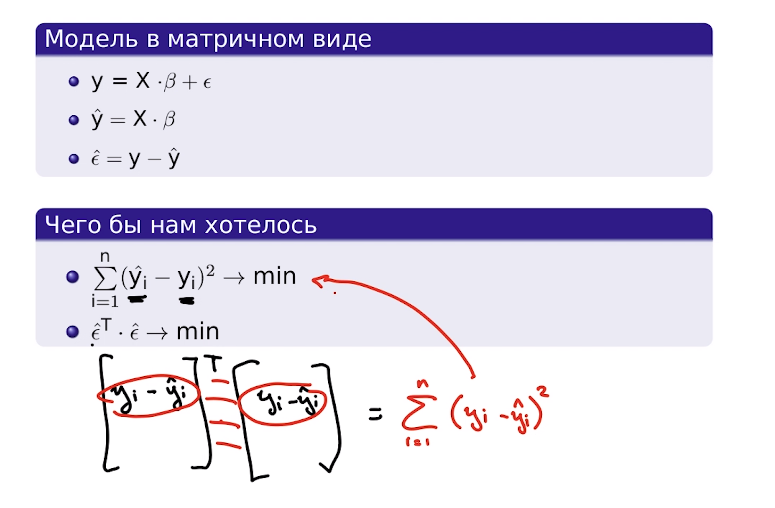

# вопрос

## Чего недостаёт в матричном описании модели по сравнению с обычным?

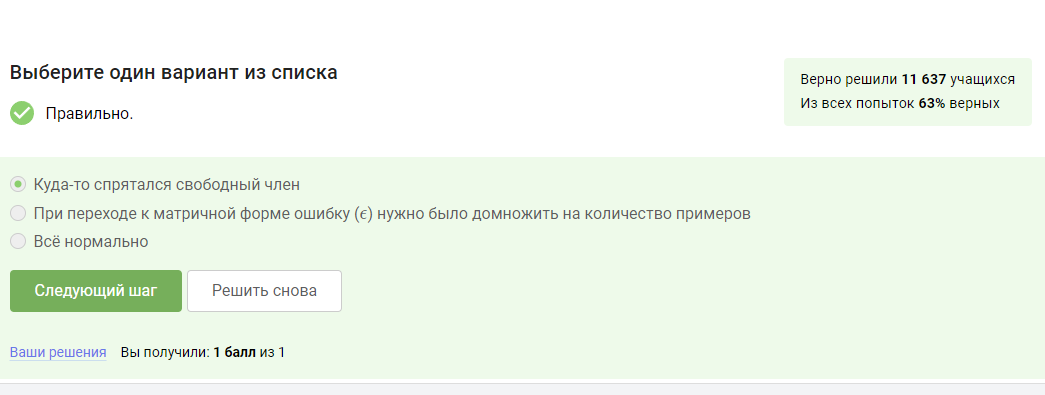

# ЗАДАНИЕ
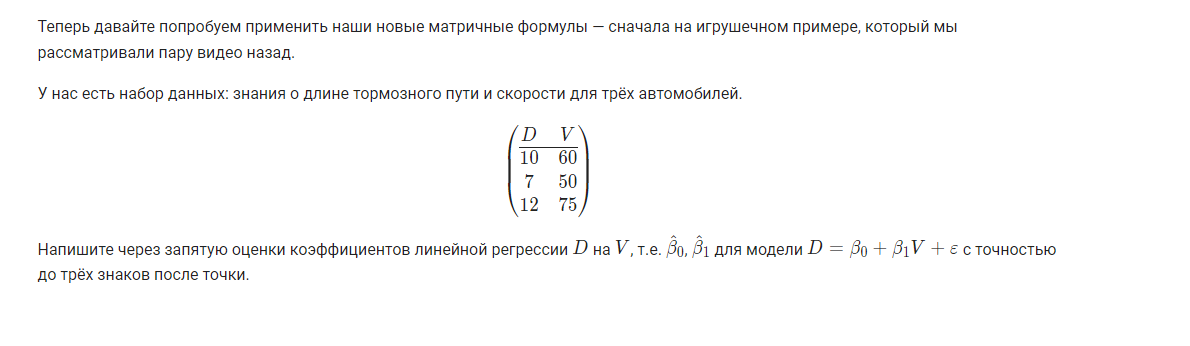

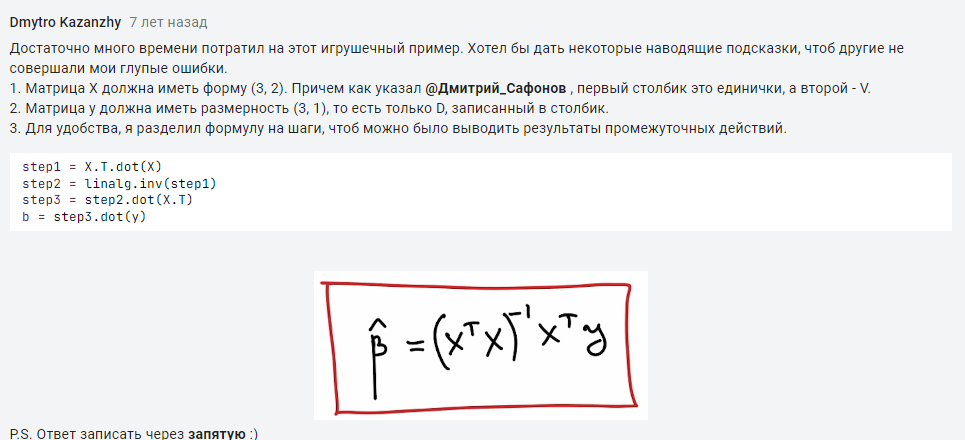

In [12]:
X = np.array([[1,60],[1,50],[1,75]])
X

array([[ 1, 60],
       [ 1, 50],
       [ 1, 75]])

In [24]:
y=np.array([[10],[7],[12]])
y

array([[10],
       [ 7],
       [12]])

In [26]:
X.T

array([[ 1,  1,  1],
       [60, 50, 75]])

In [25]:
X.T @ X

array([[    3,   185],
       [  185, 11725]])

In [27]:
np.linalg.inv(X.T @ X)

array([[ 1.23421053e+01, -1.94736842e-01],
       [-1.94736842e-01,  3.15789474e-03]])

In [28]:
np.linalg.inv(X.T @ X) @ X.T

array([[ 0.65789474,  2.60526316, -2.26315789],
       [-0.00526316, -0.03684211,  0.04210526]])

In [29]:
np.linalg.inv(X.T @ X) @ X.T @ y

array([[-2.34210526],
       [ 0.19473684]])

In [33]:
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(*b)

[-2.34210526] [0.19473684]


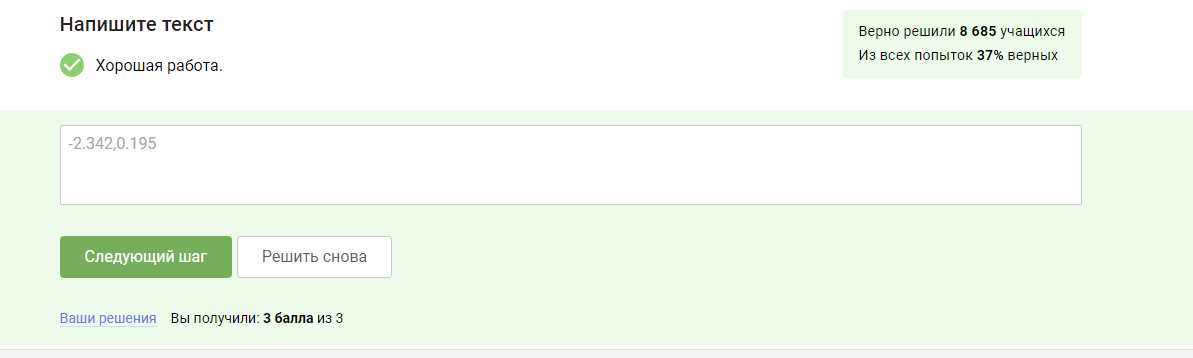

In [36]:
# Попробовал уместить в одну строку, получилось:

# a=((np.linalg.inv(x.T.dot(x))).dot(x.T)).dot(y)

# Спасибо, а то я уже хотел на бумажке или в экселе решать

In [9]:
# можно ещё проще через готовую функцию линейной регресии:

import numpy as np

arr = np.array([[10, 60]
                ,[7, 50]
                ,[12, 75]])

X = arr[:, 1]
y = arr[:, 0]

b1, b0 = np.polyfit(X, y, 1)
b0, b1

(-2.3421052631578916, 0.19473684210526312)

In [34]:
# Использование matrix дает более компактный вид кода.

import numpy as np
X = np.matrix('1 60; 1 50; 1 75')
Y = np.matrix('10; 7; 12')
b = X.T.dot(X).I.dot(X.T).dot(Y)
for i in b:
    print("%.3f" %i, end=', ')

-2.342, 0.195, 

[[-2.34210526]
 [ 0.19473684]]


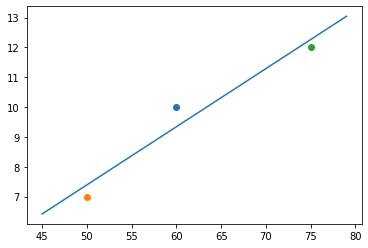

In [37]:
# с визуализацией:

import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 60], [1, 50], [1, 75]])
Y = np.array([[10], [7], [12]])

b = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
print(b)

plt.scatter(X[0,1], Y[0,0])
plt.scatter(X[1,1], Y[1,0])
plt.scatter(X[2,1], Y[2,0])

x=np.arange(X.min(0)[1]-5,X.max(0)[1]+5,1)
plt.plot(x,b[1,0]*x+b[0,0])

# вопрос

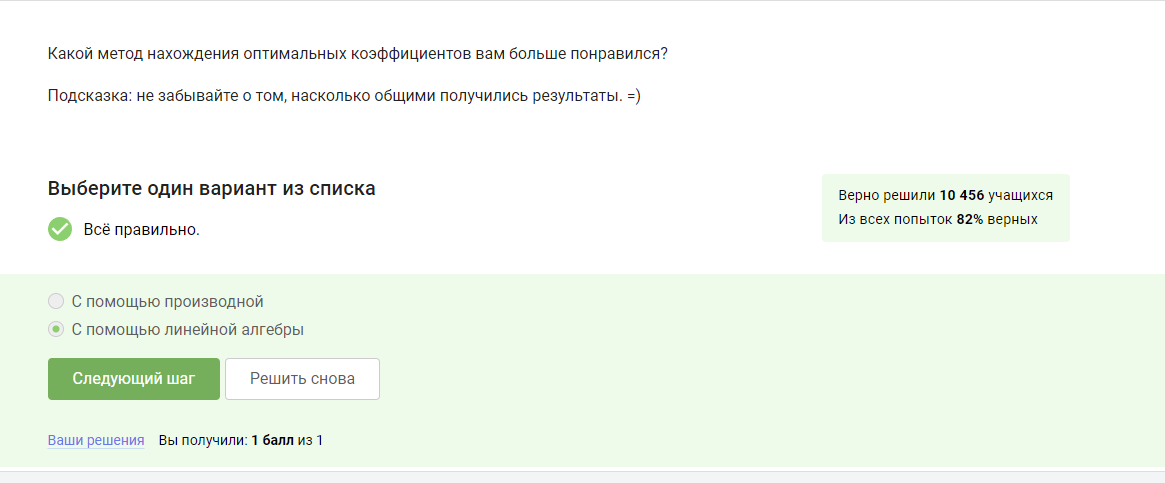

# ЗАДАНИЕ

Найдите оптимальные коэффициенты для построения линейной регрессии.

На вход вашему решению будет подано название csv-файла, из которого нужно считать данные. Пример можно посмотреть здесь. Загрузить их можно следующим образом:

https://stepik.org/media/attachments/lesson/16462/boston_houses.csv

    fname = input()  # read file name from stdin
    f = urllib.request.urlopen(fname)  # open file from URL
    data = np.loadtxt(f, delimiter=',', skiprows=1)  # load data to work with

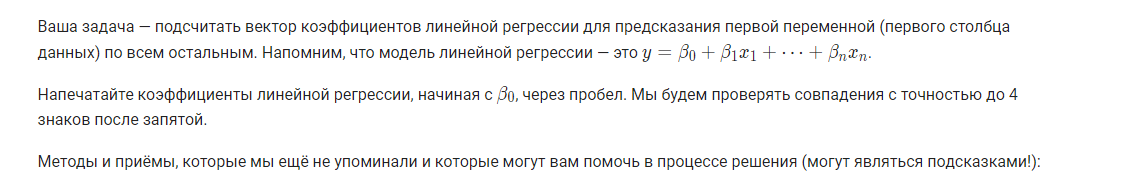

    np.hstack((array1, array2, ...))  # склеивает по строкам массивы, являющиеся компонентами кортежа, поданного на вход; массивы должны совпадать по всем измерениям, кроме второго
    
    np.ones_like(array)  # создаёт массив, состоящий из единиц, идентичный по форме массиву array
    
    "delim".join(array)  # возвращает строку, состоящую из элементов array, разделённых символами "delim"
    
    map(str, array)  # применяет функцию str к каждому элементу array

    Sample Input:

    https://stepik.org/media/attachments/lesson/16462/boston_houses.csv
    Sample Output:

-3.6558042850732986 -0.21639550236912594 0.07373059817547865 4.412450576912806 -25.468448784090892 7.143201550746702 -1.301087677648551

In [2]:
import urllib
from urllib import request
import numpy as np

fname = input()  # read file name from stdin
f = urllib.request.urlopen(fname)  # open file from URL
data = np.loadtxt(f, delimiter=',', skiprows=1)  # load data to work with

# here goes your solution

https://stepik.org/media/attachments/lesson/16462/boston_houses.csv


In [10]:
y = data[:,0]

In [11]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [16]:
X1 = np.ones_like(y)
X1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [14]:
X = data[:,1:]
X

array([[6.3200e-03, 1.8000e+01, 0.0000e+00, 5.3800e-01, 6.5750e+00,
        4.0900e+00],
       [2.7310e-02, 0.0000e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
        4.9671e+00],
       [2.7290e-02, 0.0000e+00, 0.0000e+00, 4.6900e-01, 7.1850e+00,
        4.9671e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 0.0000e+00, 5.7300e-01, 6.9760e+00,
        2.1675e+00],
       [1.0959e-01, 0.0000e+00, 0.0000e+00, 5.7300e-01, 6.7940e+00,
        2.3889e+00],
       [4.7410e-02, 0.0000e+00, 0.0000e+00, 5.7300e-01, 6.0300e+00,
        2.5050e+00]])

In [21]:
dat = np.copy(data)

In [22]:
dat[:, 0] = 1

In [23]:
dat

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 5.3800e-01, 6.5750e+00,
        4.0900e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 4.6900e-01, 6.4210e+00,
        4.9671e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 4.6900e-01, 7.1850e+00,
        4.9671e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 5.7300e-01, 6.9760e+00,
        2.1675e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 5.7300e-01, 6.7940e+00,
        2.3889e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 5.7300e-01, 6.0300e+00,
        2.5050e+00]])

In [24]:
b = np.linalg.inv(dat.T @ dat) @ dat.T @ y


In [27]:
for i in b:
    print(i, end=' ')

-3.6558042850612686 -0.21639550236914254 0.0737305981754879 4.412450576912853 -25.468448784101575 7.143201550746123 -1.3010876776491493 

In [9]:
type(data)


numpy.ndarray

In [4]:
print(data)

[[2.4000e+01 6.3200e-03 1.8000e+01 ... 5.3800e-01 6.5750e+00 4.0900e+00]
 [2.1600e+01 2.7310e-02 0.0000e+00 ... 4.6900e-01 6.4210e+00 4.9671e+00]
 [3.4700e+01 2.7290e-02 0.0000e+00 ... 4.6900e-01 7.1850e+00 4.9671e+00]
 ...
 [2.3900e+01 6.0760e-02 0.0000e+00 ... 5.7300e-01 6.9760e+00 2.1675e+00]
 [2.2000e+01 1.0959e-01 0.0000e+00 ... 5.7300e-01 6.7940e+00 2.3889e+00]
 [1.1900e+01 4.7410e-02 0.0000e+00 ... 5.7300e-01 6.0300e+00 2.5050e+00]]


In [ ]:
import urllib
from urllib import request
import numpy as np

fname = input()  # read file name from stdin
f = urllib.request.urlopen(fname)  # open file from URL
data = np.loadtxt(f, delimiter=',', skiprows=1)  # load data to work with

y = data[:,0]
dat = np.copy(data)
dat[:, 0] = 1
b = np.linalg.inv(dat.T @ dat) @ dat.T @ y
for i in b:
    print(i, end=' ')

###### Спасибо всем за комментарии. Надеюсь организаторы не сочтут этот комментарий за решение.

1. Используйте z = np.copy(x). Сначала использовал z=x, изменил в z первый столбец, он поменялся и в x.

2. Чтобы заменить весь столбец на что-то, вспомните, что конкретный элемент это a[i:j], все элементы a[:], ну а весь столбец a[:,{номер столбца}]=1

3. чтобы получить вектор столбец зависимой переменной его можно скопировать из data Y=np.copy(data)[{см.п.2 как взять столбец}]

В итоге весь код (не считая уже написанных строк) занял 4 строчки.

###### Если Вы решили предыдущую задачу - эта уже проще!

Если считана вся таблица (назовем ее XY), осталось сделать несколько простых вещей:

1. сформировать из нее вектор Y - это первый столбец таблицы.  

2. Превратить полную таблицу в X - заменить первый столбец единицами

Для этого пользуйтесь сечениями массивов

Например, "n"-ный столбец таблицы XY  - это XY[:,n]

Вот, собственно, и все - остальное Вы уже делали.

Единственный нюанс - решение надо вывести не как ВЕКТОР (что было-бы естественно и правильно),

а как список величин - посмотрите, как работает цикл

for var in Y:

         .....

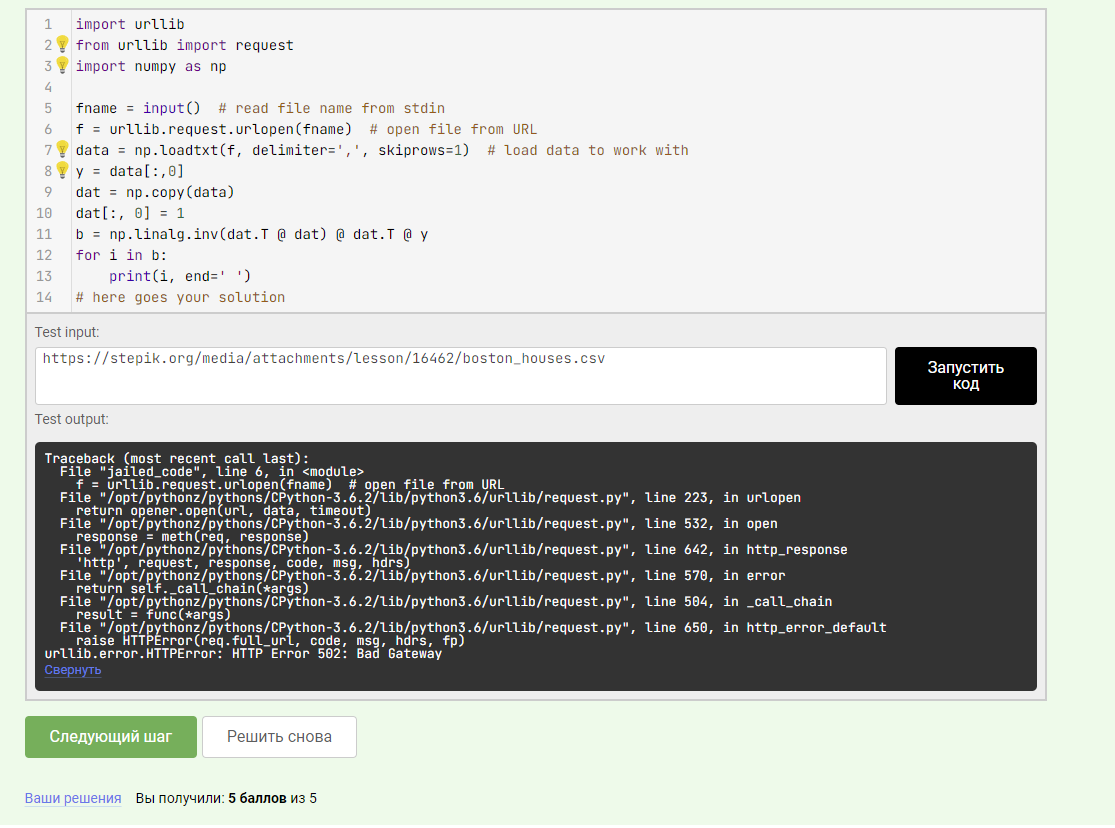

In [ ]:
from urllib.request import urlopen
import numpy as np

X = np.loadtxt(urlopen(input()), skiprows=1, delimiter=',')
Y = X[:, 0].copy()
X[:, 0] = 1
print(*np.linalg.inv(X.T @ X) @ X.T @ Y)

In [ ]:
import requests
import numpy as np


def read_csv(csv_url):
    """
    Reads data from a CSV (comma-delimited) file at the specified URL
    into a ndarray.
    """
    resp = requests.get(csv_url)
    data = np.loadtxt(resp.iter_lines(), skiprows=1, delimiter=',')

    return data


def get_target_vec(data):
    """Gets the value vector of the target variable from the ndarray."""
    return data[:, 0].reshape(-1, 1)


def get_observation_matrix(data, target_vec):
    """
    Creates a matrix of factors observation and adds a column of ones
    to it.
    """
    a = np.ones_like(y)
    b = data[:, 1:]
    observation_matrix = np.hstack((a, b))

    return observation_matrix


def calc_beta_hat(X, y):
    """Calculates the coefficient estimation vector."""
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)


if __name__ == "__main__":
    csv_url = input().rstrip()
    data = read_csv(csv_url)

    y = get_target_vec(data)
    X = get_observation_matrix(data, y)

    beta_hat = calc_beta_hat(X, y)

    print(" ".join(map(str, beta_hat.flatten())))

In [28]:
import urllib
from urllib import request
import numpy as np

fname = input()  # read file name from stdin
f = urllib.request.urlopen(fname)  # open file from URL
data = np.loadtxt(f, delimiter=',', skiprows=1)  # load data to work with

Y = data[:,0:1]
X = np.hstack((np.ones_like(Y), data[:,1:]))
B = np.linalg.inv(X.T @ X) @ X.T @ Y
print(*B.flatten())

https://stepik.org/media/attachments/lesson/16462/boston_houses.csv
-3.6558042850612686 -0.21639550236914254 0.0737305981754879 4.412450576912853 -25.468448784101575 7.143201550746123 -1.3010876776491493


In [ ]:
import urllib
from urllib import request
import numpy as np


data = np.loadtxt(urllib.request.urlopen(str(input())), delimiter=',', skiprows=1) # Ничего не могу с собой поделать, люблю однострочные решения
y = data[:, 0].copy() # Извлекаем из данных первый столбец, который по условию задания является целевой переменной
x = np.hstack((np.ones((data.shape[0], 1)), data[:, 1:])) # Добавляем к нашей матрице наблюдений слева столбец из единиц
beta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y) # Расчёт вектора коэффициентов, согласно формуле, представленной на видео в степе 11 текущего урока, тайминг - 8:14.

print(" ".join(map(str, beta.flatten())))

# Сложный вопрос

на осознание того, насколько мощным инструментом является линейная регрессия.

Какие из приведённых ниже моделей можно свести к линейной регрессии? 

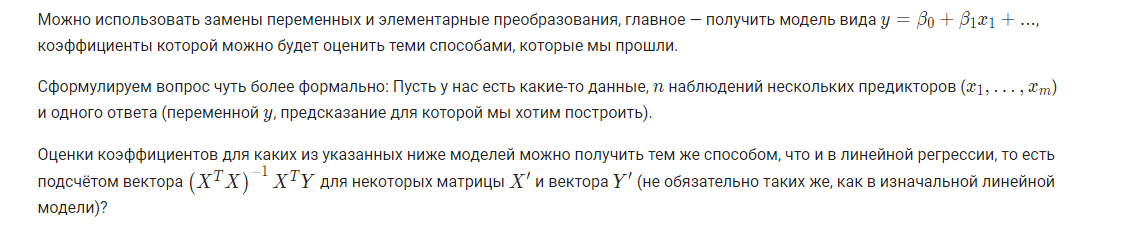

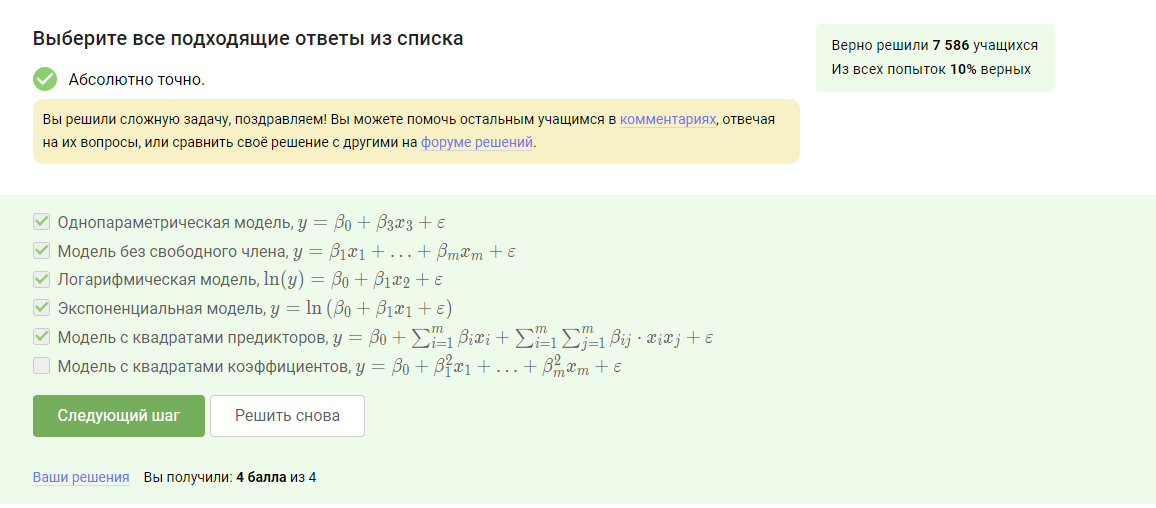

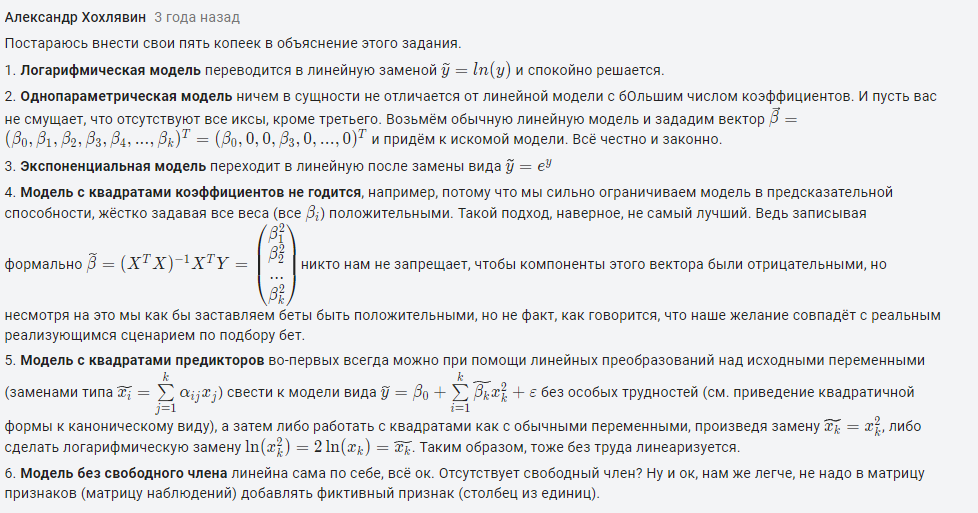